# Análisis de tarifas de operador de telecomunicaciones


## ¿Cuál es la mejor tarifa?

El operador de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial requiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Se realizará un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Se tendrán los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. El objetivo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Plan de Trabajo

Primero comenzaremos cargando las librerías que creemos que necesitaremos: pandas, stats y numpy. Cargaremos y analizaremos la información que contiene cada archivo de datos para observar su formato, como se divide y como se conectan entre sí. Comenzaremos a revisar cada archivo primero por sus duplicados y después los valores ausentes, en base a lo que se observe decidir si corregir, eliminar o rellenar los datos. Después realizaremos filtrado de datos para obtener la información con la que trabajaremos para conseguir insights de lo que nos cuentan estos. Finalizaremos poniendo a prueba algunas hipótesis para poder sacar conclusiones de lo que nos transmiten los datos.

## Carga de datos y librerías

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import levene

In [3]:
# Cargar los archivos de datos en diferentes DataFrames
calls= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint4\megaline_calls.csv")
internet= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint4\megaline_internet.csv")
messages= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint4\megaline_messages.csv")
plans= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint4\megaline_plans.csv")
users= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint4\megaline_users.csv")

# Preparar los datos

## Tarifas

In [4]:
# Imprimir la información general sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprimir los datos para las tarifas
plans.head(10)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Vemos que solo son dos filas de datos, describiendo los únicos dos planes que el servicio maneja, no se ven falta de datos o errores en los tipos de datos.

### Enriquecer los datos

In [6]:
plans['mb_per_month_included']=plans['mb_per_month_included']/1024

plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


Se realiza cambio en las unidades de la columna `'mb_per_month_included'` para manejarlo en gb.

## Usuarios/as

In [7]:
# Imprimir la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
# Imprimir una muestra de datos para usuarios
print(users.head(10))
users.describe()

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate 2099-12-12  
1 2018-08-13      surf 2099-12-12  


,user_id,age,reg_date,churn_date
count,500.000000,500.000000,500,500
mean,1249.500000,45.486000,2018-06-24 16:30:43.200000,2094-06-07 02:35:31.199999488
min,1000.000000,18.000000,2018-01-01 00:00:00,2018-07-31 00:00:00
25%,1124.750000,30.000000,2018-03-25 18:00:00,2099-12-12 00:00:00
50%,1249.500000,46.000000,2018-06-20 00:00:00,2099-12-12 00:00:00
75%,1374.250000,61.000000,2018-09-20 06:00:00,2099-12-12 00:00:00
max,1499.000000,75.000000,2018-12-31 00:00:00,2099-12-12 00:00:00
std,144.481833,16.972269,NaN,NaN


Observamos que muchos datos en `'churn_date'` están vacíos, tendremos que darles un valor para poder usarlos y no borrarlos. También podemos aprovechar y cambiar el tipo de dato a datetime. Observando los datos mediante `describe()` vemos que contamos con el grupo de usuarios del 1000 al 1499, en un rango de edad de 18 a 75 años, con una media aprox. de 45 años.

### Corregir los datos

In [20]:
print(users['user_id'].duplicated().sum())

# Se reemplazan los valores por un valor asignado para que no esten vacíos
users['churn_date'].fillna('2099-12-12',inplace=True) 
print(users.head(10))

0
   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate 2099-12-12  
1 2018-08-13      surf 2099-12-12 

In [21]:
# Se transforman los formatos a datetime
users['churn_date']=pd.to_datetime(users['churn_date'], format= '%Y-%m-%d') 
users['reg_date']=pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Ahora que ya realizamos los cambios en nuestros datos, tenemos las fechas en formato datetime, para un manejo más sencillo a la hora de filtrarlas u obtener información de estas, tenemos también los datos completos de la columna `'churn_date'` asignando un valor para los valores nulos, de manera que podamos excluirlo fácilmente si ocupamos usar la información de esta columna.

## Llamadas

In [24]:
# Imprimir la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  int32         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 4.2 MB
None


,call_id,user_id,call_date,duration,month
count,1.377350e+05,137735.000000,137735,137735.000000,137735.000000
mean,1.165150e+06,1247.658046,2018-09-25 19:57:56.319018496,7.146673,9.320797
min,1.001000e+04,1000.000000,2018-01-15 00:00:00,0.000000,1.000000
25%,1.499465e+05,1128.000000,2018-08-08 00:00:00,2.000000,8.000000
50%,1.165104e+06,1247.000000,2018-10-12 00:00:00,6.000000,10.000000
75%,1.333308e+06,1365.000000,2018-11-26 00:00:00,11.000000,11.000000
max,1.465106e+07,1499.000000,2018-12-31 00:00:00,38.000000,12.000000
std,1.643471e+06,139.416268,NaN,5.953919,2.412550


In [25]:
# Imprimir una muestra de datos para las llamadas
print(calls.head(20))

# Se revisa si hay duplicados
print(calls['call_id'].duplicated().sum())

    call_id  user_id  call_date  duration  month
0    100093     1000 2018-12-27       9.0     12
1   1000145     1000 2018-12-27      14.0     12
2   1000247     1000 2018-12-27      15.0     12
3   1000309     1000 2018-12-28       6.0     12
4   1000380     1000 2018-12-30       5.0     12
5   1000388     1000 2018-12-31       3.0     12
6   1000510     1000 2018-12-27       6.0     12
7   1000521     1000 2018-12-28      15.0     12
8   1000530     1000 2018-12-28       6.0     12
9   1000544     1000 2018-12-26       5.0     12
10  1000693     1000 2018-12-31       5.0     12
11  1000705     1000 2018-12-31      13.0     12
12  1000735     1000 2018-12-29       2.0     12
13  1000778     1000 2018-12-28       4.0     12
14  1000826     1000 2018-12-26      10.0     12
15  1000842     1000 2018-12-27       6.0     12
16    10010     1001 2018-09-06      11.0      9
17    10011     1001 2018-10-12       1.0     10
18    10012     1001 2018-10-17      16.0     10
19    10014     1001

Podemos cambiar el tipo de dato de `'call_date'` a datetime para facilitar su uso. No se encuentran duplicados. No se ve error en los datos, sin embargo el formato de la columna de id es algo inconvencional, se observa que cada llamada tiene un id para identificarla, pero además está agregado el `'user_id'` al incio del id de llamada, lo cual puede causar problemas a la hora de querer buscar una. Se cambiará el tipo de dato a 'int64' y se renombrará la columna `'call_id'`.

### Corregir los datos

In [26]:
# Se hace el cambio a datetime
calls['call_date']=pd.to_datetime(calls['call_date'], format= '%Y-%m-%d') 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  int32         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 4.2 MB


In [27]:
calls.rename(columns={'id': 'call_id'}, inplace=True)
calls['call_id']= calls['call_id'].astype('int')
calls.info()
print(calls.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  int32         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 4.2 MB
   call_id  user_id  call_date  duration  month
0   100093     1000 2018-12-27       9.0     12
1  1000145     1000 2018-12-27      14.0     12
2  1000247     1000 2018-12-27      15.0     12
3  1000309     1000 2018-12-28       6.0     12
4  1000380     1000 2018-12-30       5.0     12
5  1000388     1000 2018-12-31       3.0     12
6  1000510     1000 2018-12-27       6.0     12
7  1000521     1000 2018-12-28      15.0     12
8  1000530     1000 2018-12-28       6.0   

### Enriquecer los datos

In [28]:
# Se crea columna con el mes, extrayendolo de la columna con formato datetime
calls['month']=calls['call_date'].dt.month
calls['duration']=np.ceil(calls['duration'])
print(calls)

        call_id  user_id  call_date  duration  month
0        100093     1000 2018-12-27       9.0     12
1       1000145     1000 2018-12-27      14.0     12
2       1000247     1000 2018-12-27      15.0     12
3       1000309     1000 2018-12-28       6.0     12
4       1000380     1000 2018-12-30       5.0     12
...         ...      ...        ...       ...    ...
137730  1499199     1499 2018-11-21       9.0     11
137731  1499200     1499 2018-10-20      11.0     10
137732  1499201     1499 2018-09-21       9.0      9
137733  1499202     1499 2018-10-10       1.0     10
137734  1499203     1499 2018-12-29      14.0     12

[137735 rows x 5 columns]


Ahora ya tenemos nuestra columna de datos en formato de fecha para manejar los datos de manera más eficiente y también se agregó una columna con el mes usando la columna de la fecha para tener la información de manera más breve. Se redondearon las duraciones de llamadas para tener números enteros y tener una distrución más uniforme a la hora de graficar. También cambiamos la columna de `'id'` por `'call_id'` para poder identificarla mejor a la hora de juntar información y se transformó a 'int' para manejar mejor la información de esta columna.

## Mensajes

In [29]:
# Imprimir la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [30]:
# Imprimir una muestra de datos para los mensajes
print(messages.head(10))
print(messages['id'].duplicated().sum())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28
0


Tenemos la misma situación que el df pasado, haremos los cambios necesarios para tener un mejor formato y cambiaremos el tipo de dato de la columna `'message_date'`.

### Corregir los datos

In [31]:
messages['id']= messages['id'].astype('int')
messages.rename(columns={'id':'message_id'},inplace= True)
messages.info()
print(messages.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_id    76051 non-null  int32 
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 1.5+ MB
   message_id  user_id message_date
0     1000125     1000   2018-12-27
1     1000160     1000   2018-12-31
2     1000223     1000   2018-12-31
3     1000251     1000   2018-12-27
4     1000255     1000   2018-12-26
5     1000346     1000   2018-12-29
6     1000386     1000   2018-12-30
7     1000413     1000   2018-12-31
8     1000502     1000   2018-12-27
9     1000525     1000   2018-12-28


### Enriquecer los datos

In [32]:
messages['message_date']=pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')
messages['month']=messages['message_date'].dt.month
print(messages)


       message_id  user_id message_date  month
0         1000125     1000   2018-12-27     12
1         1000160     1000   2018-12-31     12
2         1000223     1000   2018-12-31     12
3         1000251     1000   2018-12-27     12
4         1000255     1000   2018-12-26     12
...           ...      ...          ...    ...
76046     1497526     1497   2018-12-24     12
76047     1497536     1497   2018-12-24     12
76048     1497547     1497   2018-12-31     12
76049     1497558     1497   2018-12-24     12
76050     1497613     1497   2018-12-23     12

[76051 rows x 4 columns]


Ahora ya cambiamos de `'id'` a `'message_id'` para un mejor entendimiento a la hora de juntar los datos, y transformamos las fechas a formato datetime, extrayendo el mes en una nueva columna `'month'`.

## Internet

In [33]:
# Imprimir la información general/resumida sobre el DataFrame de internet
print(internet.info())
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [34]:
# Imprimir una muestra de datos para el tráfico de internet
print(internet.head(10))
print()
print(internet['id'].duplicated().sum())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92

0


Mismo caso de los df pasados, repetiremos el proceso para optimizar los datos.

### Corregir los datos

In [35]:
internet['session_date']=pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
internet['id']= internet['id'].astype('int')
internet.rename(columns={'id':'internet_id'},inplace= True)
internet.info()
print(internet.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  int32         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 2.8 MB
   internet_id  user_id session_date  mb_used
0       100013     1000   2018-12-29    89.86
1      1000204     1000   2018-12-31     0.00
2      1000379     1000   2018-12-28   660.40
3      1000413     1000   2018-12-26   270.99
4      1000442     1000   2018-12-27   880.22
5        10010     1001   2018-08-24   284.68
6        10013     1001   2018-12-09   656.04
7        10014     1001   2018-11-04    16.97
8       100110     1001   2018-11-27   135.18
9       100115     1001   2018-12-13   761.92

### Enriquecer los datos

In [36]:
internet['month']= internet['session_date'].dt.month
print(internet)

        internet_id  user_id session_date  mb_used  month
0            100013     1000   2018-12-29    89.86     12
1           1000204     1000   2018-12-31     0.00     12
2           1000379     1000   2018-12-28   660.40     12
3           1000413     1000   2018-12-26   270.99     12
4           1000442     1000   2018-12-27   880.22     12
...             ...      ...          ...      ...    ...
104820      1499215     1499   2018-10-20   218.06     10
104821      1499216     1499   2018-12-30   304.72     12
104822      1499217     1499   2018-09-22   292.75      9
104823      1499218     1499   2018-12-07     0.00     12
104824      1499219     1499   2018-12-24   758.31     12

[104825 rows x 5 columns]


Al igual que con los df pasados, transformamos la columna con las fechas a formato datetime, y extraemos el mes en una nueva columna `'month'`, y renombramos la columna `'id'` como `'internet_id'` para mejor entendimiento. 

## Estudiar las condiciones de las tarifas

In [38]:
# Imprime las condiciones de la tarifa denuevo para recordarlas
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [39]:
# Calcular el número de llamadas hechas por cada usuario al mes. 

# Se ordenan los datos por usuario y mes, y se extrae la cantidad de llamadas en la columna de id de llamadas
calls_by_user=calls.groupby(['user_id','month'])['call_id'].count().reset_index() 
print(calls_by_user.head()) 


   user_id  month  call_id
0     1000     12       16
1     1001      8       27
2     1001      9       49
3     1001     10       65
4     1001     11       64


In [40]:
# Calcular la cantidad de minutos usados por cada usuario al mes. 

# Se hace lo mismo, solo que en este caso se suman la cantidad de minutos en llamada
minutes_by_user=calls.groupby(['user_id','month'])['duration'].sum().reset_index() 
print(minutes_by_user)


      user_id  month  duration
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2253     1498     12     339.0
2254     1499      9     346.0
2255     1499     10     385.0
2256     1499     11     308.0
2257     1499     12     496.0

[2258 rows x 3 columns]


In [41]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Se hace lo mismo, pero contando la cantidad de mensajes
msg_by_user= messages.groupby(['user_id','month'])['message_id'].count().reset_index() 
print(msg_by_user)

      user_id  month  message_id
0        1000     12          11
1        1001      8          30
2        1001      9          44
3        1001     10          53
4        1001     11          36
...       ...    ...         ...
1801     1496      9          21
1802     1496     10          18
1803     1496     11          13
1804     1496     12          11
1805     1497     12          50

[1806 rows x 3 columns]


In [42]:
# Calcular el volumen del tráfico de Internet usado por cada usuario al mes. 

# Se hace lo mismo pero sumando la cantidad de mb usados
gb_used_by_user=internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
gb_used_by_user['mb_used']=np.ceil(gb_used_by_user['mb_used'])
gb_used_by_user['mb_used']=np.ceil(gb_used_by_user['mb_used']/1024)
gb_used_by_user.rename(columns={'mb_used':'gb_used'}, inplace= True)
print(gb_used_by_user)


      user_id  month  gb_used
0        1000     12      2.0
1        1001      8      7.0
2        1001      9     14.0
3        1001     10     22.0
4        1001     11     19.0
...       ...    ...      ...
2272     1498     12     23.0
2273     1499      9     13.0
2274     1499     10     20.0
2275     1499     11     17.0
2276     1499     12     22.0

[2277 rows x 3 columns]


In [43]:
# Fusionar los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Se crea un df con toda la información, uniendo todo mediante el mes y user_id
user_data_monthly=calls_by_user.merge(minutes_by_user,on=['user_id','month'],how='outer')
user_data_monthly=user_data_monthly.merge(msg_by_user,on=['user_id','month'],how='outer')
user_data_monthly=user_data_monthly.merge(gb_used_by_user,on=['user_id','month'],how='outer')

# Se hace un cambio en el nombre de la columna duration par a un mejor entendimiento de la información
user_data_monthly.rename(columns={'duration':'call_time'}, inplace=True)

#Se deja un 0 en las partes donde falten datos para que no irrumpa con nuestro trabajo
user_data_monthly.fillna(0, inplace= True)

user_data_monthly

,user_id,month,call_id,call_time,message_id,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


In [44]:
# Añadir la información de la tarifa

# Se extrae los usuarios y su plan correspondiente del df users
user_plans= users[['user_id','plan']]

# Se une la información 
user_data_monthly= user_data_monthly.merge(user_plans, on='user_id', how='left')
user_data_monthly.rename(columns={'plan':'plan_name'},inplace=True)
print(user_data_monthly)


      user_id  month  call_id  call_time  message_id  gb_used plan_name
0        1000     12     16.0      124.0        11.0      2.0  ultimate
1        1001      8     27.0      182.0        30.0      7.0      surf
2        1001      9     49.0      315.0        44.0     14.0      surf
3        1001     10     65.0      393.0        53.0     22.0      surf
4        1001     11     64.0      426.0        36.0     19.0      surf
...       ...    ...      ...        ...         ...      ...       ...
2288     1349     12      0.0        0.0        61.0     13.0      surf
2289     1361      5      0.0        0.0         2.0      2.0      surf
2290     1482     10      0.0        0.0         2.0      0.0  ultimate
2291     1108     12      0.0        0.0         0.0      1.0  ultimate
2292     1311      6      0.0        0.0         0.0      2.0  ultimate

[2293 rows x 7 columns]


In [45]:
# Calcular el ingreso mensual para cada usuario

# Primero revisamos si los usuarios excedieron sus minutos de llamada mensuales
def callexc(row):
    minutes_used= row['call_time']
    plan= row['plan_name'] # Se extraen los valores de las respectivas filas
    if plan == 'surf': # Se revisa que plan tiene
        if minutes_used > 500: # Se revisa si supero la cantidad de su plan
            return minutes_used - 500 # Se muestra la cantidad excedida
        else:
            return 0
    elif plan == 'ultimate':
        if minutes_used > 3000:
            return minutes_used - 3000
        else: 
            return 0
#se aplica nuestra función al df y se guarda el resultado en una nueva columna con los minutos excedidos
user_data_monthly['mins_exc']= user_data_monthly.apply(callexc, axis=1) 

# Realizamos el cálculo de cuanto será el ingreso por minutos excedidas
def callfee(row):
    minutes_exc=row['mins_exc']
    plan= row['plan_name']
    if plan == 'surf':
        return minutes_exc * .03
    else:
        return minutes_exc * .01
    
# Se aplica la función en el df y se guarda en una columna con el ingreso    
user_data_monthly['exc_call_income']= user_data_monthly.apply(callfee, axis=1).round(2) 
print(user_data_monthly)


      user_id  month  call_id  call_time  message_id  gb_used plan_name  \
0        1000     12     16.0      124.0        11.0      2.0  ultimate   
1        1001      8     27.0      182.0        30.0      7.0      surf   
2        1001      9     49.0      315.0        44.0     14.0      surf   
3        1001     10     65.0      393.0        53.0     22.0      surf   
4        1001     11     64.0      426.0        36.0     19.0      surf   
...       ...    ...      ...        ...         ...      ...       ...   
2288     1349     12      0.0        0.0        61.0     13.0      surf   
2289     1361      5      0.0        0.0         2.0      2.0      surf   
2290     1482     10      0.0        0.0         2.0      0.0  ultimate   
2291     1108     12      0.0        0.0         0.0      1.0  ultimate   
2292     1311      6      0.0        0.0         0.0      2.0  ultimate   

      mins_exc  exc_call_income  
0          0.0              0.0  
1          0.0              0.0

In [46]:
def msgexc(row):
    msg_used= row['message_id']
    plan= row['plan_name']
    if plan == 'surf':
        if msg_used > 50:
            return msg_used - 50
        else:
            return 0
    elif plan == 'ultimate':
        if msg_used > 1000:
            return msg_used - 1000
        else: 
            return 0

user_data_monthly['msg_exc']= user_data_monthly.apply(msgexc, axis=1)
def msgfee(row):
    msg_exc=row['msg_exc']
    plan= row['plan_name']
    if plan == 'surf':
        return msg_exc * .03
    else:
        return msg_exc * .01
user_data_monthly['exc_msg_income']= user_data_monthly.apply(msgfee, axis=1).round(2)
print(user_data_monthly)

      user_id  month  call_id  call_time  message_id  gb_used plan_name  \
0        1000     12     16.0      124.0        11.0      2.0  ultimate   
1        1001      8     27.0      182.0        30.0      7.0      surf   
2        1001      9     49.0      315.0        44.0     14.0      surf   
3        1001     10     65.0      393.0        53.0     22.0      surf   
4        1001     11     64.0      426.0        36.0     19.0      surf   
...       ...    ...      ...        ...         ...      ...       ...   
2288     1349     12      0.0        0.0        61.0     13.0      surf   
2289     1361      5      0.0        0.0         2.0      2.0      surf   
2290     1482     10      0.0        0.0         2.0      0.0  ultimate   
2291     1108     12      0.0        0.0         0.0      1.0  ultimate   
2292     1311      6      0.0        0.0         0.0      2.0  ultimate   

      mins_exc  exc_call_income  msg_exc  exc_msg_income  
0          0.0              0.0      0.0

In [47]:
def gbexc(row):
    gb_used= row['gb_used']
    plan= row['plan_name']
    if plan == 'surf':
        if gb_used > 15:
            return gb_used - 15
        else:
            return 0
    elif plan == 'ultimate':
        if gb_used > 30:
            return gb_used - 30
        else: 
            return 0

user_data_monthly['gb_exc']= user_data_monthly.apply(gbexc, axis=1)
def gbfee(row):
    gb_exc=row['gb_exc']
    plan= row['plan_name']
    if plan == 'surf':
        return gb_exc * 10
    else:
        return gb_exc * 7
user_data_monthly['exc_gb_income']= user_data_monthly.apply(gbfee, axis=1).round(2)
print(user_data_monthly)

      user_id  month  call_id  call_time  message_id  gb_used plan_name  \
0        1000     12     16.0      124.0        11.0      2.0  ultimate   
1        1001      8     27.0      182.0        30.0      7.0      surf   
2        1001      9     49.0      315.0        44.0     14.0      surf   
3        1001     10     65.0      393.0        53.0     22.0      surf   
4        1001     11     64.0      426.0        36.0     19.0      surf   
...       ...    ...      ...        ...         ...      ...       ...   
2288     1349     12      0.0        0.0        61.0     13.0      surf   
2289     1361      5      0.0        0.0         2.0      2.0      surf   
2290     1482     10      0.0        0.0         2.0      0.0  ultimate   
2291     1108     12      0.0        0.0         0.0      1.0  ultimate   
2292     1311      6      0.0        0.0         0.0      2.0  ultimate   

      mins_exc  exc_call_income  msg_exc  exc_msg_income  gb_exc  \
0          0.0              0.0

In [48]:
# Se extrae el costo de los planes
plan_cost= plans[['plan_name','usd_monthly_pay']] 

# Se agrega el costo del plan a nuestro df de todos los datos
user_data_monthly= user_data_monthly.merge(plan_cost, on='plan_name') 

# Se cambia el nombre de la columna para mejor entendimiento
user_data_monthly.rename(columns={'usd_monthly_pay':'plan_cost'}, inplace= True) 

# Se hace una columna del total de todos los costos mensuales, sumando los valores de otras columnas
user_data_monthly['total_income']= user_data_monthly['exc_call_income']+ user_data_monthly['exc_msg_income']+ user_data_monthly['exc_gb_income']+ user_data_monthly['plan_cost']
print(user_data_monthly)

      user_id  month  call_id  call_time  message_id  gb_used plan_name  \
0        1000     12     16.0      124.0        11.0      2.0  ultimate   
1        1006     11      2.0       10.0        15.0      3.0  ultimate   
2        1006     12      9.0       59.0       139.0     32.0  ultimate   
3        1008     10     71.0      476.0        21.0     17.0  ultimate   
4        1008     11     63.0      446.0        37.0     24.0  ultimate   
...       ...    ...      ...        ...         ...      ...       ...   
2288     1194     12      0.0        0.0        56.0     31.0      surf   
2289     1349     10      0.0        0.0        76.0     13.0      surf   
2290     1349     11      0.0        0.0        72.0     17.0      surf   
2291     1349     12      0.0        0.0        61.0     13.0      surf   
2292     1361      5      0.0        0.0         2.0      2.0      surf   

      mins_exc  exc_call_income  msg_exc  exc_msg_income  gb_exc  \
0          0.0              0.0

Ahora en nuestra tabla general de datos mensuales por usuario agregamos información respectiva de sus consumos mensuales,
en dado caso de que hayan rebasado las llamadas, mensajes o datos de su plan, se mostrará su excedente y cuanto les 
costará. Creamos una nueva columna llamada `'gb_used'` en la que hacemos la conversión del consumo de internet de mb a gb para tener una conversión del plan tarifario más sencilla. Se agrega una columna con el costo del plan de cada usuario y se
agrega una última columna con el pago mensual que se realizo una vez sumados todos los parámetros.

## Estudia el comportamiento de usuario

### Llamadas

    month  call_time_surf  call_time_ultimate
0       1      203.000000          193.500000
1       2      297.000000          403.142857
2       3      330.000000          304.250000
3       4      351.540000          336.857143
4       5      399.584416          406.241379
5       6      431.298969          370.957447
6       7      449.983471          427.067797
7       8      410.111111          421.436620
8       9      414.226804          437.511628
9      10      429.729958          450.735849
10     11      423.325088          445.196850
11     12      473.836478          459.099338


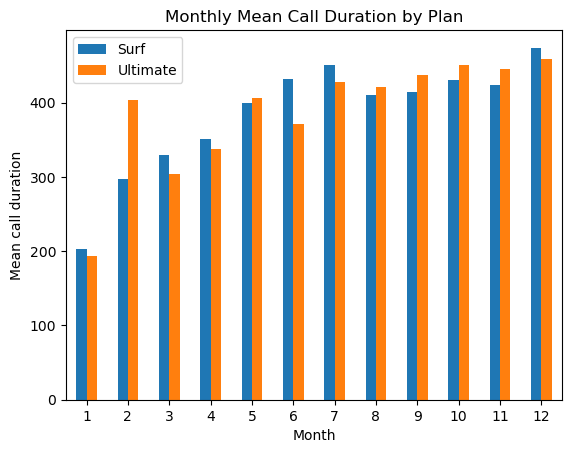

In [49]:
# Comparar la duración promedio de llamadas por cada plan y por cada mes. 

# Se saca el promedio de llamadas del plan Surf
mean_call_time_surf=user_data_monthly.groupby(by=['plan_name','month']).mean().reset_index()
mean_call_time_surf= mean_call_time_surf.query('plan_name == "surf"')
mean_call_time_surf= mean_call_time_surf[['month','call_time']]

# Se saca el promedio de llamdas del plan Ultimate
mean_call_time_ultimate=user_data_monthly.groupby(by=['plan_name','month']).mean().reset_index()
mean_call_time_ultimate= mean_call_time_ultimate.query('plan_name == "ultimate"')
mean_call_time_ultimate= mean_call_time_ultimate[['month','call_time']]

# Se juntan los valores en base al mes
mean_call_time= mean_call_time_surf.merge(mean_call_time_ultimate, on='month')
mean_call_time.columns=['month','call_time_surf','call_time_ultimate']
print(mean_call_time)

# Se crea la gráfica de barras
mean_call_time.plot(
    x='month',
    kind='bar',
    xlabel='Month',
    ylabel='Mean call duration',
    title='Monthly Mean Call Duration by Plan',
    rot=0
    
)
plt.legend(['Surf','Ultimate'])
plt.show()

  plan_name  call_time
0  ultimate      124.0
1  ultimate       10.0
2  ultimate       59.0
3  ultimate      476.0
4  ultimate      446.0
5  ultimate      634.0
6  ultimate      118.0
7  ultimate      499.0
8  ultimate      486.0
9  ultimate      484.0


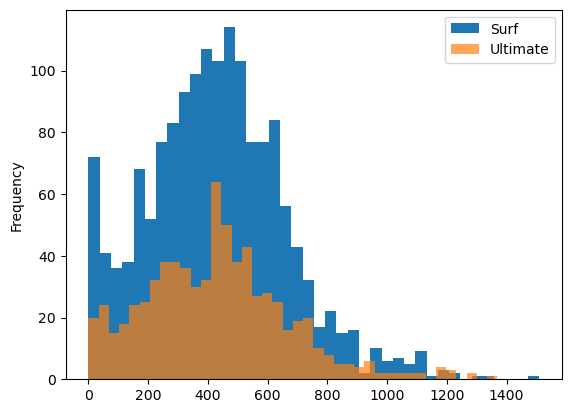

In [50]:
# Comparar el número de minutos mensuales que necesitan los usuarios de cada plan.

# Se sacan los minutos registrados de llamadas al mes
monthly_minutes= user_data_monthly[['plan_name','call_time']]
print(monthly_minutes.head(10))

# Se crea primer histograma con los minutos del plan Surf
monthly_minutes[monthly_minutes['plan_name']=='surf']['call_time'].plot(kind='hist', bins=40)

# Se crea segundo histograma con los minutos del plan Ultimate
monthly_minutes[monthly_minutes['plan_name']=='ultimate']['call_time'].plot(kind='hist', bins=40, alpha=0.7)

# Se cambia nombre a las leyendas
plt.legend(['Surf','Ultimate'])
plt.show()


In [51]:
# Calcular la media y la varianza de la duración mensual de llamadas.

# Se extraen las duraciones de llamadas por plan
call_time_surf=monthly_minutes[monthly_minutes['plan_name']=='surf']['call_time']
call_time_ultimate=monthly_minutes[monthly_minutes['plan_name']=='ultimate']['call_time']

# Se saca la varianza de cada plan
var_call_time_surf=np.var(monthly_minutes[monthly_minutes['plan_name']=='surf']['call_time'])
var_call_time_ultimate=np.var(monthly_minutes[monthly_minutes['plan_name']=='ultimate']['call_time'])

# Se muestra la media y la varianza de los planes
print('La media del plan Surf es:', call_time_surf.mean(), 'y su varianza es:',var_call_time_surf)
print('La media del plan Ultimate es:', call_time_ultimate.mean(),'y su varianza es:',var_call_time_ultimate)
print()

# Se muestran los datos estadísticos del plan Surf
print('Datos de la duración de llamadas de el plan Surf')
print(call_time_surf.describe())
print()

# Se muestran los datos estadísticos del plan Ultimate
print('Datos de la duración de llamadas de el plan Ultimate')
print(call_time_ultimate.describe())

La media del plan Surf es: 428.7495232040687 y su varianza es: 54933.33459131747
La media del plan Ultimate es: 430.45 y su varianza es: 57764.12527777776

Datos de la duración de llamadas de el plan Surf
count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: call_time, dtype: float64

Datos de la duración de llamadas de el plan Ultimate
count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: call_time, dtype: float64


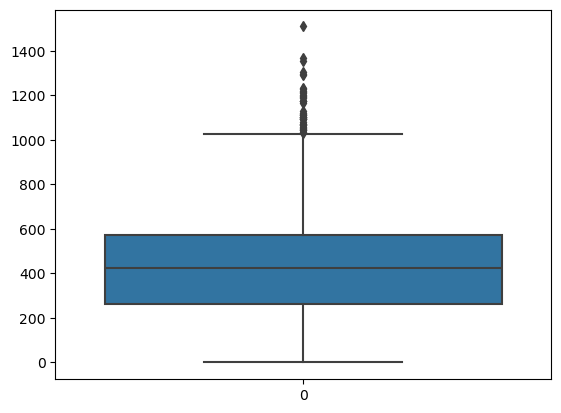

In [52]:
# Se traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=monthly_minutes['call_time'])
plt.show()

Podemos observar que los comportamientos entre los dos planes son muy similares, la diferencia que se pudiera ver es solamente en la frecuencia o cantidades acumuladas por la diferencia que se tienen de usuarios, pero el comportamiento tanto en la gráfica de distribución de minutos como la gráifca de barras de llamadas mensuales se puede ver que llevan la misma tendencia y no varía entre plan. A pesar de que la diferencia de minutos mensuales de cada plan es significativa podemos ver que la media de los dos planes es similar, cercano al límite de los minutos mensuales del plan Surf.

### Mensajes

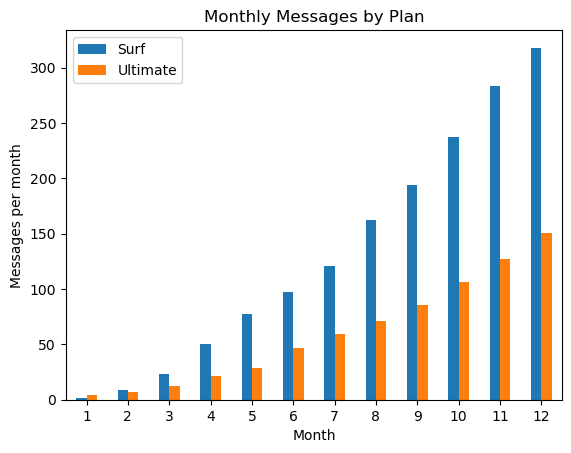

In [53]:
# Comprarar el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Se extraen la cantidad de mensajes mensuales del plan Surf
msg_surf=user_data_monthly.groupby(by=['plan_name','month']).count().reset_index()
msg_surf= msg_surf.query('plan_name == "surf"')
msg_surf= msg_surf[['month','message_id']]

# Se extraen la cantidad de mensajes mensuales del plan Ultimate
msg_ultimate=user_data_monthly.groupby(by=['plan_name','month']).count().reset_index()
msg_ultimate= msg_ultimate.query('plan_name == "ultimate"')
msg_ultimate= msg_ultimate[['month','message_id']]

# Se juntan los datos en base a los meses para realizar una gráfica de barras comparativa por mes
msg_total= msg_surf.merge(msg_ultimate, on='month')
msg_total.columns=['month','msg_surf','msg_ultimate']

#Se crea la gráfica
msg_total.plot(
    x='month',
    kind='bar',
    xlabel='Month',
    ylabel='Messages per month',
    title='Monthly Messages by Plan',
    rot=0
    
)
plt.legend(['Surf','Ultimate'])
plt.show()

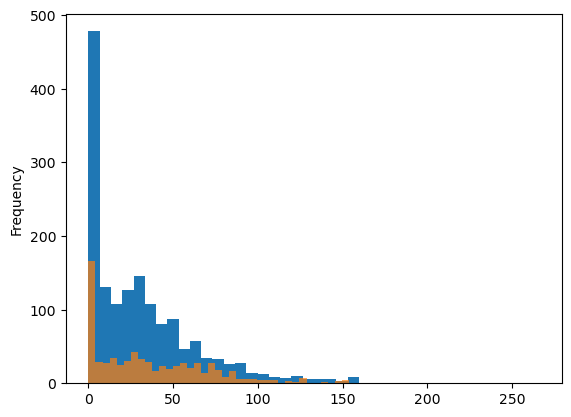

In [54]:
# Se extra la cantidad de mensajes de los usuarios por plan
monthly_messages=user_data_monthly[['plan_name','message_id']]

# Se hace primer histograma de el plan Surf
monthly_messages[monthly_messages['plan_name']=='surf']['message_id'].plot(kind='hist', bins=40)

# Se hace segundo histograma de el plan Ultimate
monthly_messages[monthly_messages['plan_name']=='ultimate']['message_id'].plot(kind='hist', bins=40, alpha=0.7)

plt.show()

In [55]:
# Calcular la media y la varianza de los mensajes mensuales.

# Se extraen las cantidades mensajes por plan
msg_surf=monthly_messages[monthly_messages['plan_name']=='surf']['message_id']
msg_ultimate=monthly_messages[monthly_messages['plan_name']=='ultimate']['message_id']

# Se sacan las varianzas
var_msg_surf=np.var(monthly_messages[monthly_messages['plan_name']=='surf']['message_id'])
var_msg_ultimate=np.var(monthly_messages[monthly_messages['plan_name']=='ultimate']['message_id'])

# Se imprimen los resultados de media y varianza
print('La media del plan Surf es:', msg_surf.mean(), 'y su varianza es:',var_msg_surf)
print('La media del plan Ultimate es:', msg_ultimate.mean(),'y su varianza es:',var_msg_ultimate)
print()

# Se imprimen datos estadísticos de cada plan
print('Datos de los mensajes de el plan Surf')
print(msg_surf.describe())
print()
print('Datos de los mensajes de el plan Ultimate')
print(msg_ultimate.describe())

La media del plan Surf es: 31.15956770502225 y su varianza es: 1126.0082317266633
La media del plan Ultimate es: 37.55138888888889 y su varianza es: 1207.0779147376504

Datos de los mensajes de el plan Surf
count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: message_id, dtype: float64

Datos de los mensajes de el plan Ultimate
count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: message_id, dtype: float64


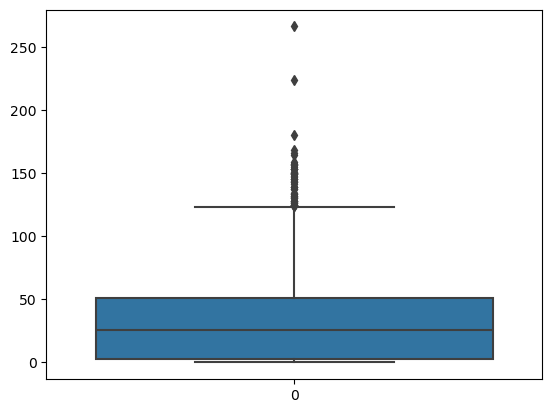

In [56]:
# Se traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes mensuales
sns.boxplot(data=monthly_messages['message_id'])
plt.show()

Al igual que en las llamadas, la tendencia es la misma en ambos planes, en este caso podemos ver que la mayoría de los usuarios no usan tanto el servicio de mensajes de texto. Observamos que las medias y medianas son similares con una diferencia aprox de 6, pero a pesar de que el servicio Surf tiene menos mensajes en el plan, es normalmente el que más mensajes envía de los dos. 

### Internet

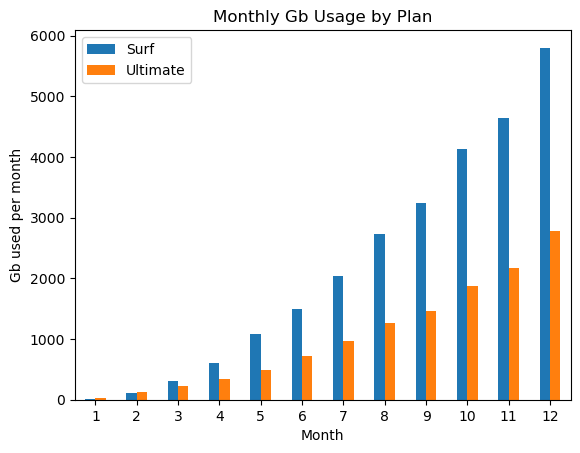

In [57]:
# Comparar la cantidad de tráfico de Internet consumido por usuarios por plan

# Se extraen la cantidad de gb consumidos mensuales del plan Surf
gb_surf=user_data_monthly.groupby(by=['plan_name','month']).sum().reset_index()
gb_surf= gb_surf.query('plan_name == "surf"')
gb_surf= gb_surf[['month','gb_used']]

# Se extraen la cantidad de gb consumidos mensuales del plan Ultimate
gb_ultimate=user_data_monthly.groupby(by=['plan_name','month']).sum().reset_index()
gb_ultimate= gb_ultimate.query('plan_name == "ultimate"')
gb_ultimate= gb_ultimate[['month','gb_used']]

# Se juntan los datos en base a los meses para realizar una gráfica de barras comparativa por mes
gb_total= gb_surf.merge(gb_ultimate, on='month')
gb_total.columns=['month','gb_used_surf','gb_used_ultimate']

# Se crea la gráfica
gb_total.plot(
    x='month',
    kind='bar',
    xlabel='Month',
    ylabel='Gb used per month',
    title='Monthly Gb Usage by Plan',
    rot=0
    
)
plt.legend(['Surf','Ultimate'])
plt.show()

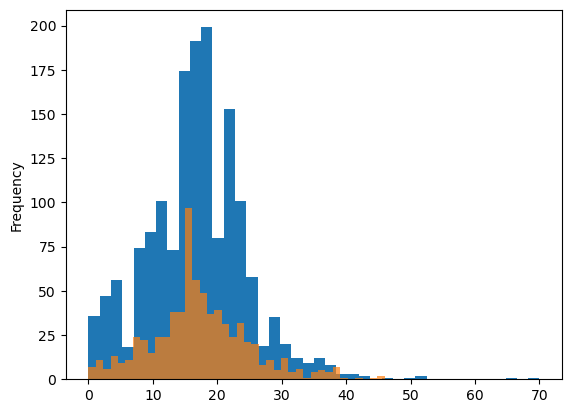

In [58]:
# Se saca la cantidad de gb usados mensuales por plan
monthly_gb_used=user_data_monthly[['plan_name','gb_used']]

# Se crea primer histograma para el plan Surf
monthly_gb_used[monthly_gb_used['plan_name']=='surf']['gb_used'].plot(kind='hist', bins=40)

# Se crea segundo histograma para el plan Ultimate
monthly_gb_used[monthly_gb_used['plan_name']=='ultimate']['gb_used'].plot(kind='hist', bins=40, alpha=0.7)

plt.show()

In [59]:
# Calcular la media y la varianza de los gb usados mensuales.

# Se extraen las cantidades gb usados por plan
gb_surf=monthly_gb_used[monthly_gb_used['plan_name']=='surf']['gb_used']
gb_ultimate=monthly_gb_used[monthly_gb_used['plan_name']=='ultimate']['gb_used']

# Se sacan las varianzas
var_gb_surf=np.var(monthly_gb_used[monthly_gb_used['plan_name']=='surf']['gb_used'])
var_gb_ultimate=np.var(monthly_gb_used[monthly_gb_used['plan_name']=='ultimate']['gb_used'])

# Se muestran las medias y las varianzas
print('La media del plan Surf es:', gb_surf.mean(), 'y su varianza es:',var_gb_surf)
print('La media del plan Ultimate es:', gb_ultimate.mean(),'y su varianza es:',var_gb_ultimate)
print()

# Se imprimen datos estadísticos de cada plan 
print('Datos del internet consumido de el plan Surf')
print(gb_surf.describe())
print()
print('Datos del internet consumido de el plan Ultimate')
print(gb_ultimate.describe())

La media del plan Surf es: 16.670692943420217 y su varianza es: 61.544449424470294
La media del plan Ultimate es: 17.306944444444444 y su varianza es: 58.748840663580175

Datos del internet consumido de el plan Surf
count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

Datos del internet consumido de el plan Ultimate
count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used, dtype: float64


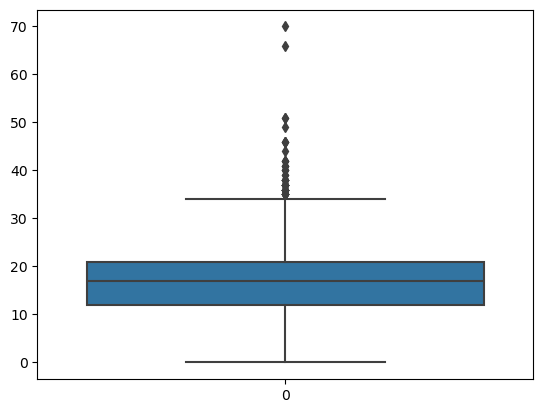

In [60]:
# Se traza un diagrama de caja para visualizar la distribución de la cantidad de gb usados mensuales
sns.boxplot(data=monthly_gb_used['gb_used'])
plt.show()

Vemos el mismo comportamiento, las tendencias son las mismas entre planes. Las medias son casi iguales, siendo de 40.14 y 41.08, la mediana es la misma siendo 42, pero observamos que en el plan Surf los usuarios suelen tener valores en el extremo superior más altos que los del plan Ultimate, a pesar de tener una menor cantidad de gb disponibles.

## Ingreso

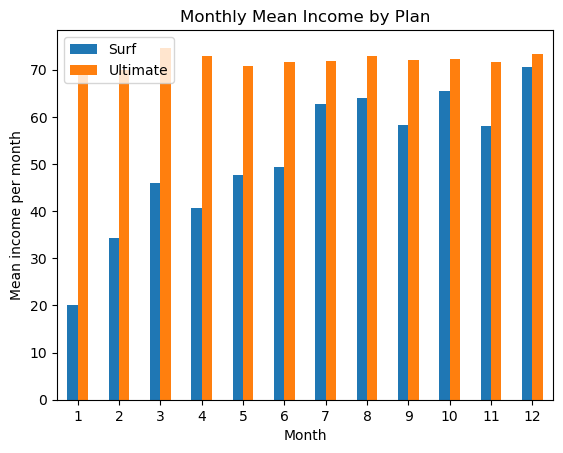

In [62]:
# Comparar la cantidad de ingreso por usuarios por plan

# Se extraen la cantidad media de ingresos mensuales del plan Surf
mean_income_surf=user_data_monthly.groupby(by=['plan_name','month']).mean().reset_index()
mean_income_surf= mean_income_surf.query('plan_name == "surf"')
mean_income_surf= mean_income_surf[['month','total_income']]

# Se extraen la cantidad media de ingresos mensuales del plan Ultimate
mean_income_ultimate=user_data_monthly.groupby(by=['plan_name','month']).mean().reset_index()
mean_income_ultimate= mean_income_ultimate.query('plan_name == "ultimate"')
mean_income_ultimate= mean_income_ultimate[['month','total_income']]

# Se juntan los datos en base a los meses para realizar una gráfica de barras comparativa por mes
mean_income_total= mean_income_surf.merge(mean_income_ultimate, on='month')
mean_income_total.columns=['month','mean_income_surf','mean_income_ultimate']

# Se crea la gráfica
mean_income_total.plot(
    x='month',
    kind='bar',
    xlabel='Month',
    ylabel='Mean income per month',
    title='Monthly Mean Income by Plan',
    rot=0
    
)
plt.legend(['Surf','Ultimate'])
plt.show()

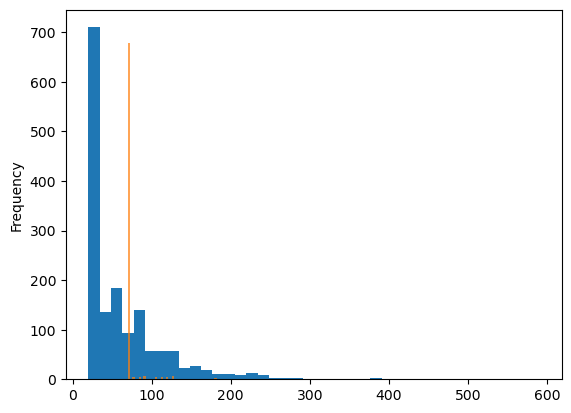

In [64]:
# Se sacan los ingresos por plan
monthly_income=user_data_monthly[['plan_name','total_income']]

# Se crea primer histograma para los ingresos del plan Surf
monthly_income[monthly_income['plan_name']=='surf']['total_income'].plot(kind='hist', bins=40)

# Se crea segundo histograma para los ingresos del plan Ultimate
monthly_income[monthly_income['plan_name']=='ultimate']['total_income'].plot(kind='hist', bins=40, alpha=0.7)

plt.show()

In [66]:
# Calcular la media y la varianza de los ingresos mensuales.

# Se extraen los ingresos por plan
income_surf=monthly_income[monthly_income['plan_name']=='surf']['total_income']
income_ultimate=monthly_income[monthly_income['plan_name']=='ultimate']['total_income']

# Se sacan las varianzas
var_income_surf=np.var(monthly_income[monthly_income['plan_name']=='surf']['total_income'])
var_income_ultimate=np.var(monthly_income[monthly_income['plan_name']=='ultimate']['total_income'])

# Se muestran las medias y las varianzas

print('La media del plan Surf es:', income_surf.mean(), 'y su varianza es:',var_income_surf)
print('La media del plan Ultimate es:', income_ultimate.mean(),'y su varianza es:',var_income_ultimate)
print()

# Se imprimen datos estadísticos de cada plan 
print('Datos del internet consumido de el plan Surf')
print(income_surf.describe())
print()
print('Datos del internet consumido de el plan Ultimate')
print(income_ultimate.describe())

La media del plan Surf es: 60.706408137317226 y su varianza es: 3065.8848438690225
La media del plan Ultimate es: 72.31388888888888 y su varianza es: 129.66814043209837

Datos del internet consumido de el plan Surf
count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_income, dtype: float64

Datos del internet consumido de el plan Ultimate
count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_income, dtype: float64


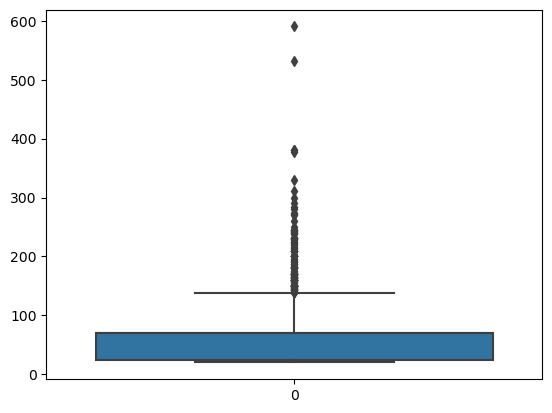

In [67]:
# Se traza un diagrama de caja para visualizar la distribución de los ingresos mensuales
sns.boxplot(data=monthly_income['total_income'])
plt.show()

Aquí podemos hacer una observación interesante, los usuarios del plan surf tienden más a excederse en las tarifas de sus planes, a veces llegando a pagar más de lo que los usuarios ultimate pagan mensualmente. En el caso del plan ultimate, son pocos los que tienden a rebasar las tarifas y suelen pagar el costo del plan únicamente. Podemos observar por primera vez una gran diferencia en la media, los usuarios del plan Surf pagando 282 en promedio y los usuarios del plan Ultimate 166. Esto se correlaciona con el hecho de que tanto en llamadas, mensajes e internet estuvieran similares en uso, teniendo en cuenta que los límites son diferentes y el costo por superarlos.

## Prueba las hipótesis estadísticas

### Primera hipótesis

Probaremos la hipótesis de que el ingreso promedio de los planes son diferentes.

* Hipótesis nula: Los ingresos promedio de los planes de llamada son iguales.

* Hipótesis alternativa: Los ingresos promedio de los planes de llamada son diferentes.

In [68]:
# Se sacan los ingresos de cada plan 
surf_income= monthly_income[monthly_income['plan_name']=='surf']['total_income']
ultimate_income= monthly_income[monthly_income['plan_name']=='ultimate']['total_income']

# Se realiza prueba para homogeneidad de varianzas
statistic, levene_plan_income= levene(surf_income, ultimate_income)

# Se compara el resultado con un nivel de significancia
alpha=0.5
if levene_plan_income > alpha:
    print('No hay evidencia para rechazar una igualdad de varianzas')
    equal_var= True
else:
    print('Se rechaza la igualdad de varianzas')
    equal_var= False

Se rechaza la igualdad de varianzas


In [69]:
# Se realiza la prueba para calcular la igualdad de dos poblaciones
income_results_by_plan=st.ttest_ind(surf_income, ultimate_income, equal_var= equal_var)

print('El valor p es igual a:', income_results_by_plan.pvalue)

if income_results_by_plan.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


El valor p es igual a: 3.1703905481135734e-15
Rechazamos la hipótesis nula


### Segunda hipótesis

Probaremos la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

* Hipótesis nula: Los ingresos promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

* Hipótesis alternativa: Los ingresos promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [70]:
# Se saca la información que se trabajará, el usuario y su ingreso
income_by_city= user_data_monthly[['user_id','total_income']]

# Se saca la ciudad de los usuarios del df users
users_city= users[['user_id','city']]

# Se crea df con la información de ingreso de los usuarios y su ciudad
income_by_city= income_by_city.merge(users_city, on='user_id', how='left')

# Se sacan los ingresos de la población de NY-NJ
income_NY_NJ= income_by_city[income_by_city['city'] ==  'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']

# Se sacan los ingresos del resto de la población
income_rest= income_by_city[income_by_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']

print('La media de ingreso en NY-NJ es:',income_by_city[income_by_city['city'] ==  'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income'].mean(),'y su varianza:', np.var(income_by_city[income_by_city['city'] ==  'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']))
print('La media de ingreso en el resto de las ciudades es:',income_by_city[income_by_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income'].mean(),'y su varianza:', np.var(income_by_city[income_by_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']))



La media de ingreso en NY-NJ es: 59.92135278514589 y su varianza: 1890.5177172681151
La media de ingreso en el resto de las ciudades es: 65.2227713987474 y su varianza: 2223.886695816218


In [71]:
# Se realiza prueba para homogeneidad de varianzas
statistic, levene_city_income= levene(income_NY_NJ, income_rest)
# Se compara el resultado con un nivel de significancia
alpha=0.5
if levene_city_income > alpha:
    print('No hay evidencia para rechazar una igualdad de varianzas')
    equal_var= True
else:
    print('Se rechaza la igualdad de varianzas')
    equal_var= False
    
# Se realiza la prueba para calcular la igualdad de dos poblaciones
income_results_by_city=st.ttest_ind(income_NY_NJ, income_rest, equal_var= equal_var)

print('El valor p es igual a:', income_results_by_city.pvalue)
if income_results_by_city.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


Se rechaza la igualdad de varianzas
El valor p es igual a: 0.033525615885300314
Rechazamos la hipótesis nula


La primera hipótesis que pusimos a prueba en cuanto a la diferencia de ingresos de ambos planes, nos dió un resultado que 
nos indica el que realmente hay una diferencia entre los dos ingresos ya que la probabilidad de que nos de una diferencia
de ese valor es muy mínima. Para el segundo caso, en el que nuestra prueba fue revisar que el promedio de ingreso de la 
región NY-NJ es diferente al resto de las ciudades, nos dió como resultado el rechazar la hipótesis nula, ya que la 
probabilidad de resultado es muy poca, con un 0.4%, así que sería correcto decir que el ingreso de esa región es diferente
al del resto de ciudades.

## Conclusión general



1.	Se cargaron todas las librerías que se consideraron importantes a utilizar en el proyecto realizado, sabiendo que se iba a realizar limpieza y arreglo de datos, operaciones para creación de columnas, gráficas y pruebas estadísticas. 

2.	Se revisó cada dataframe y su contenido para ver de que manera se podía optimizar su uso, como lo fue con la transformación de fechas a datetime, el renombrar columnas para un mejor manejo o la transformación de unidades en el consumo de internet para tener una unidad estándar.

3.	Se realizó un dataframe en el que pudiéramos manejar todos los consumos de los usuarios, primero extrayendo los consumibles por usuario y mes de cada dataframe para unirlos en uno solo, en base al usuario y el mes.

4.	Se asignó a cada uno el plan tarifario correspondiente y se añadieron su exceso de consumo en llamadas, mensajes e internet y su cuota total.

5.	Se realizaron para cada apartado del plan, gráficas de barras para comparar el consumo mensual por plan, histogramas para observar la distribución en el consumo de los clientes, se obtuvieron datos estadísticos para observar las diferencias y se realizaron boxplots para observar los cuartiles y los datos en los extremos.

6.	Se realizaron dos pruebas de hipótesis en las que primero se realizó una prueba para checar la igualdad de las varianzas entre poblaciones, para después hacer una prueba de igualdad de media de poblaciones y tomar una postura respecto a las hipótesis que realizamos.

7.	Hay un área de oportunidad para la telefónica para ofrecer a sus usuarios de el plan Surf que rebasan mensualmente la tarifa llegando a estar cerca o incluso rebasar el costo de la tarifa ultimate, ofrecerles subir de plan para que pueden tener un mejor manejo de su plan y evitar recargos grandes.

8.	El plan Ultimate es la que deja más ingresos a la compañía y los usuarios quedan dentro de los parámetros que este ofrece, por lo tanto hay que hacer más publicidad de que la gente comience con este plan.

9.	Las diferencias entre un plan y otro en cuanto uso de llamadas, mensajes e internet es muy poco, las tendencias entre los usuarios son las mismas.
